In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [5]:
df=pd.read_csv("Mall_Customers.csv")

In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis:

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

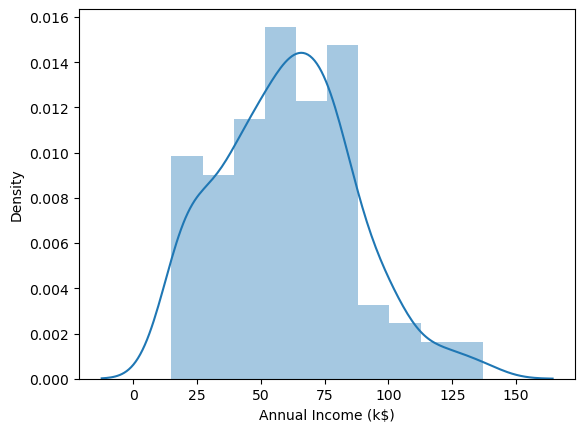

In [8]:
sns.distplot(df["Annual Income (k$)"])

In [9]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

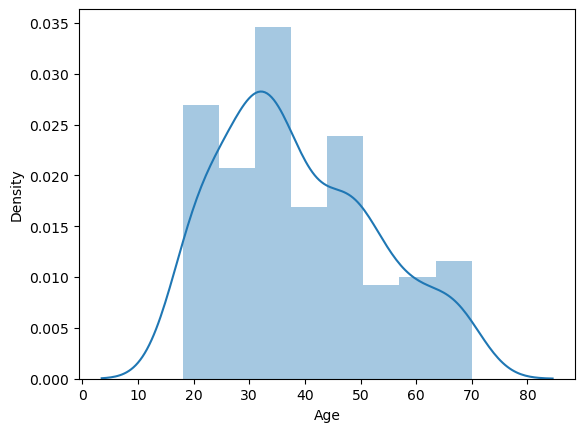

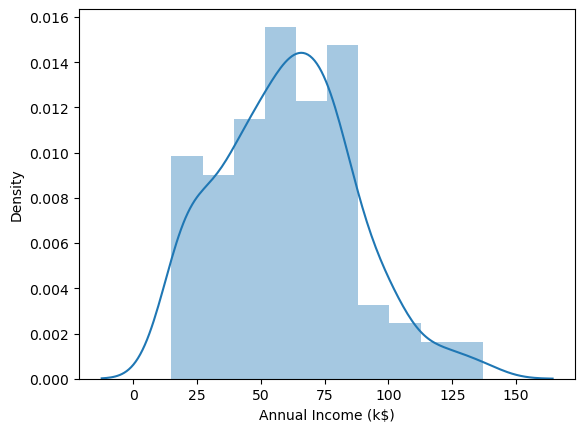

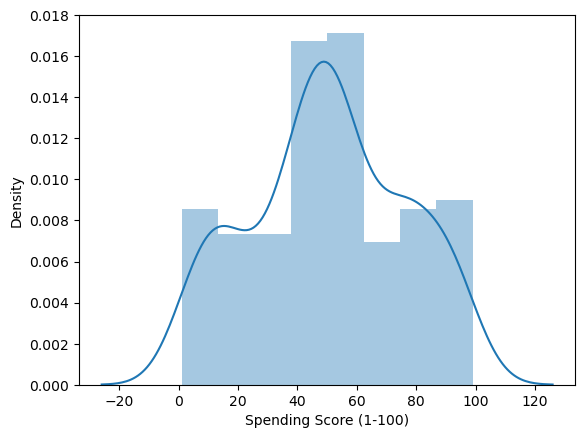

In [12]:
columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

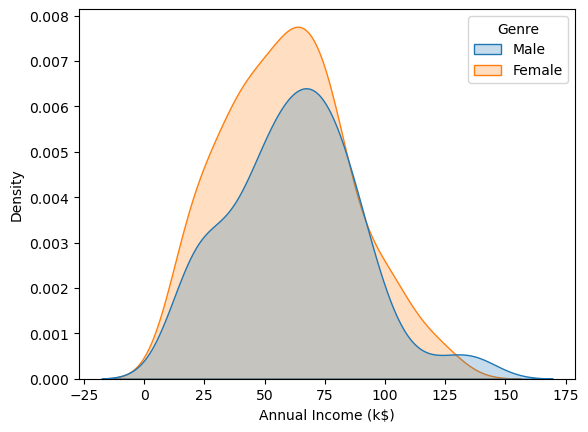

In [14]:
sns.kdeplot(df["Annual Income (k$)"],shade=True,hue=df["Genre"]);

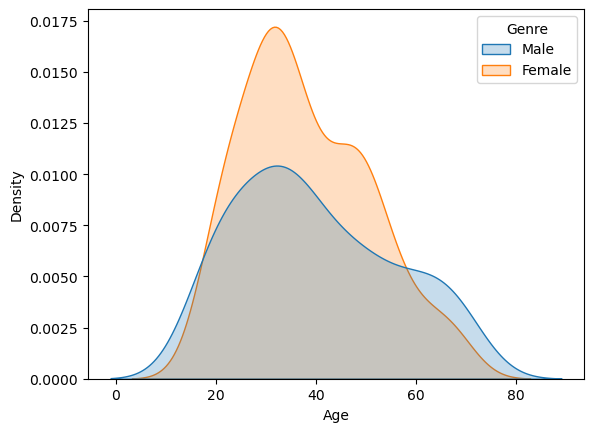

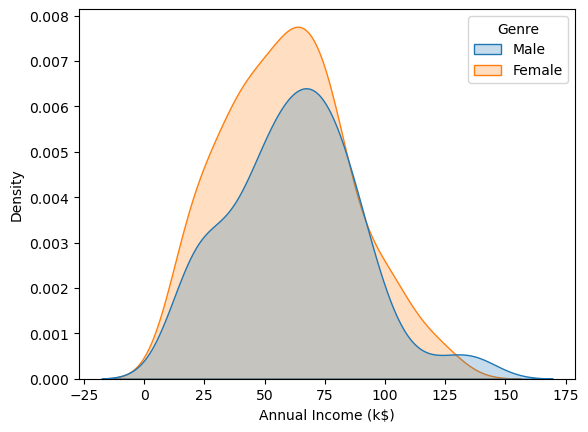

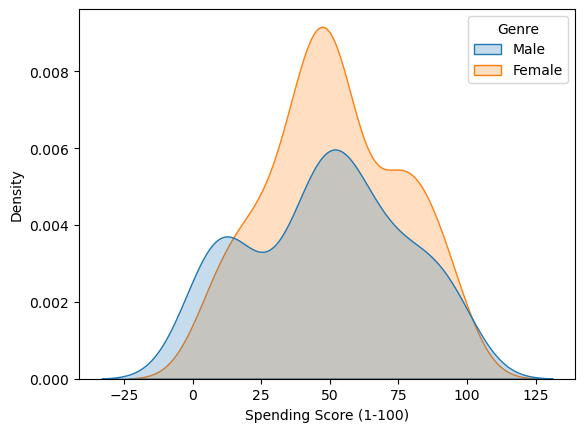

In [15]:
columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df["Genre"]);
   

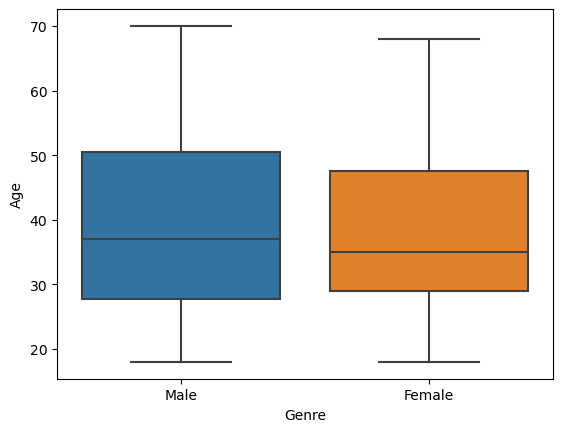

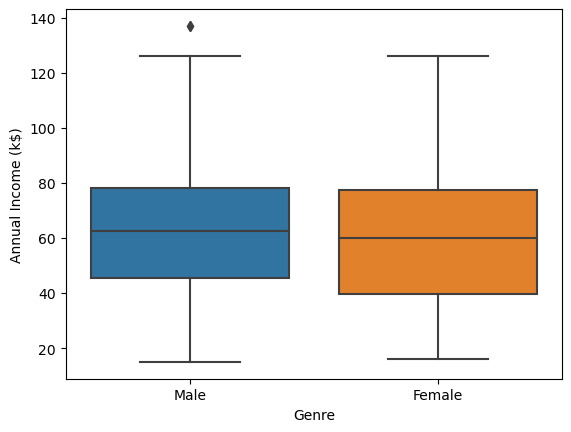

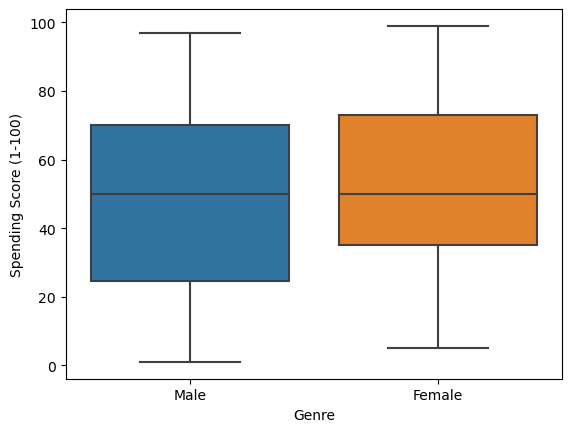

In [16]:
columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x="Genre",y=df[i])
   

In [18]:
df["Genre"].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Genre, dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

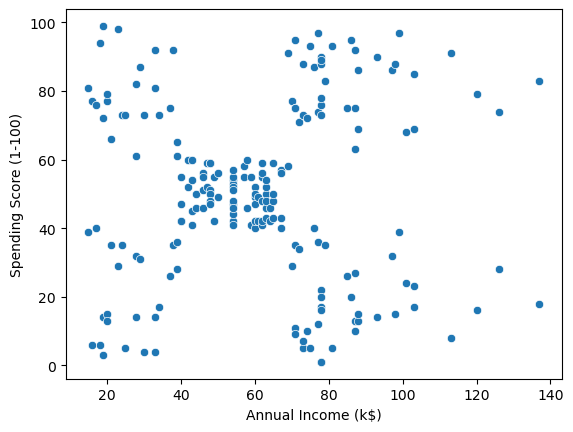

In [19]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

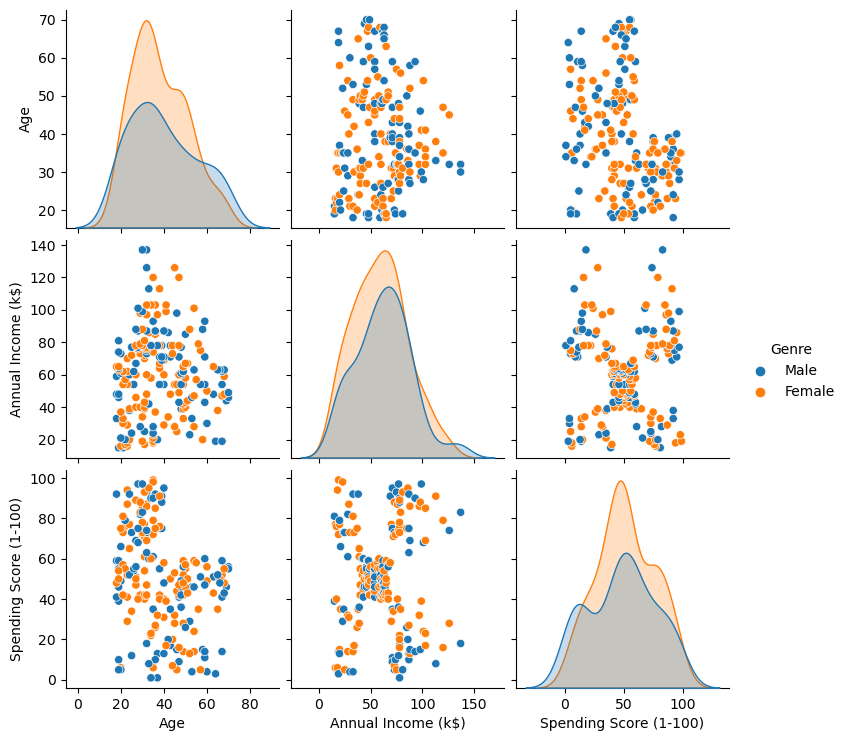

In [22]:
#df=df.drop("CustomerID",axis=1)
sns.pairplot(data=df,hue="Genre")

In [23]:
df.groupby(["Genre"])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [24]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

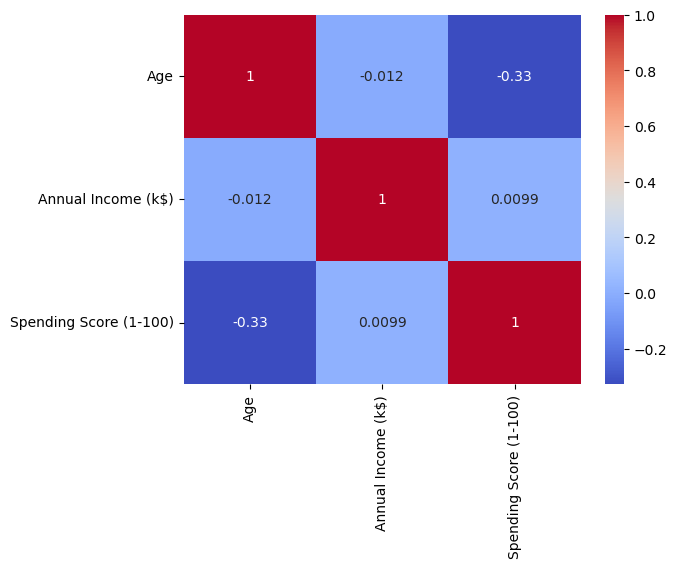

In [25]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

# Clustering- Univariate,Bivariate

In [44]:
clustering1= KMeans(n_clusters=3)

In [45]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [46]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [47]:
df["Income_cluster"]=clustering1.labels_
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Income_cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [48]:
df["Income_cluster"].value_counts()

0    90
1    74
2    36
Name: Income_cluster, dtype: int64

In [49]:
clustering1.inertia_

23517.330930930937

In [50]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [51]:
inertia_scores

[137277.28,
 48660.88888888889,
 23517.330930930937,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3941.4163614163617,
 2857.441697191697,
 2182.59696969697,
 1808.2204129204129]

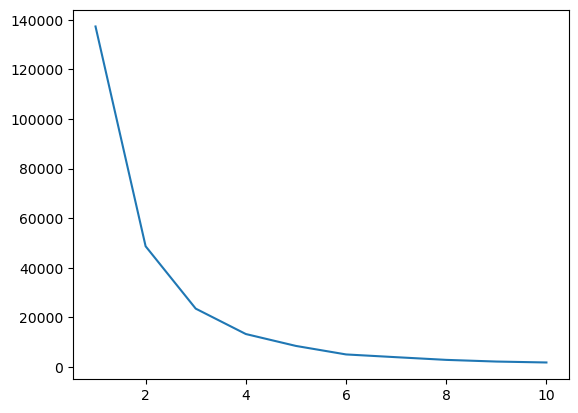

In [52]:
plt.plot(range(1,11),inertia_scores)

In [53]:
df.groupby("Income_cluster")['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income_cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


# Bivariate

In [57]:
clustering2= KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df["spending_and_Income_cluster"]=clustering2.labels_
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,spending_and_Income_cluster
0,Male,19,15,39,1,1
1,Male,21,15,81,1,4
2,Female,20,16,6,1,1
3,Female,23,16,77,1,4
4,Female,31,17,40,1,1


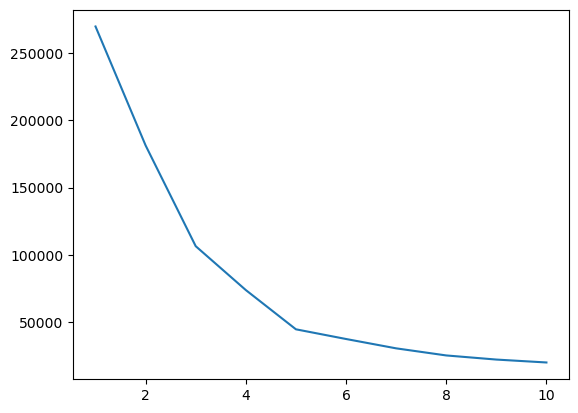

In [58]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [61]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=["x","y"]

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

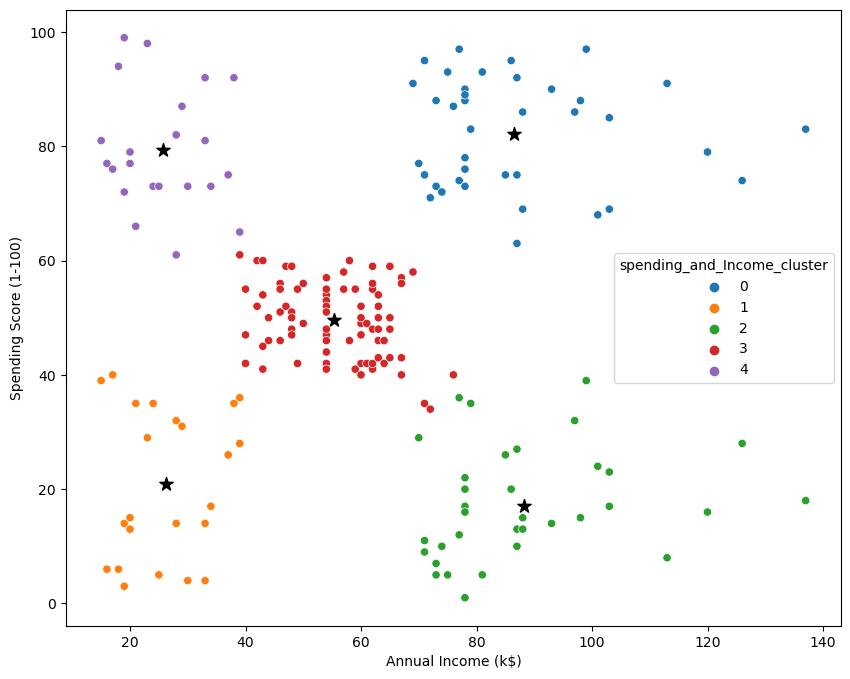

In [63]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers["x"],y=centers["y"],s=100,c="black",marker="*")
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue="spending_and_Income_cluster",palette="tab10")

In [65]:
pd.crosstab(df["spending_and_Income_cluster"],df["Genre"],normalize="index")

Genre,Female,Male
spending_and_Income_cluster,,
0,0.538462,0.461538
1,0.608696,0.391304
2,0.457143,0.542857
3,0.592593,0.407407
4,0.590909,0.409091


In [66]:
df.groupby("spending_and_Income_cluster")['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
spending_and_Income_cluster,,,
0,32.692308,86.538462,82.128205
1,45.217391,26.304348,20.913043
2,41.114286,88.200000,17.114286
3,42.716049,55.296296,49.518519
4,25.272727,25.727273,79.363636
